## Setup & Package Installation
---

- Install datasets
- Install HuggingFace Hub


In [2]:
!pip install datasets huggingface_hub

  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
     ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
     -------------------------------------- - 71.7/74.8 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 74.8/74.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.5 kB ? eta -:--:--
   ------------------ --------------------- 225.3/491.5 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 491.5/491.5 kB 5.1 MB/s eta 0:00:00
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached multiprocess-0.70.16-py312-none-any.whl (146 kB)
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
    --------------------------------------- 0.6/25.7 MB 17.8 MB/s eta 0:00:02
   -- ------------------------------------- 1.6/25.7 MB 21.0 MB/s eta 0:00:02


# Synthetic MNIST - Houdini-Generated Digits

This dataset contains 40,960 procedurally generated digit images (0–9),
created with SideFX Houdini. Each digit class uses 64 different fonts
and 64 frame variations (rotation, skew, jitter, grayscale noise).

- Image Size: 28×28
- Format: PNG or JPEG
- Channels: Grayscale (1 channel)
- Labels: Folder name = digit class (0–9)

## Usage with PyTorch

```python
from torchvision.datasets import ImageFolder
dataset = ImageFolder( "synthetic_digits" )
```


Number of images: 40960
torch.Size([64, 3, 28, 28])
tensor([1, 2, 9, 3, 8, 4, 5, 7, 1, 5, 4, 7, 4, 4, 9, 2, 1, 4, 4, 2, 7, 0, 8, 6,
        5, 1, 7, 2, 5, 6, 4, 2, 1, 6, 6, 2, 9, 3, 7, 3, 3, 0, 8, 5, 3, 3, 7, 8,
        8, 0, 1, 3, 6, 0, 0, 7, 0, 5, 0, 6, 7, 4, 3, 3])


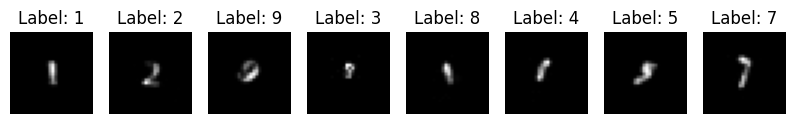

In [2]:
import os
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Create transform for the dataset using the mean and std computed below ...
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.01599], std=[0.07722])
])

folder  = os.path.join( "..", "data", "synthetic_digits" )
dataset = ImageFolder( root=folder, transform=transform )
loader  = DataLoader( dataset, batch_size=64, shuffle=True )
print( f"Number of images: {len(dataset)}" )

# Preview a batch
images, labels = next( iter(loader) )
print( images.shape )  # [64, 1, 28, 28]
print( labels )        # Tensor of digit labels

# Visualize a few
plt.figure( figsize=(10, 2) )
for i in range( 8 ):
    plt.subplot( 1, 8, i+1 )
    plt.imshow( images[i][0], cmap="gray" )
    plt.title( f"Label: {labels[i].item()}" )
    plt.axis( 'off' )
plt.show( )


# Compute the mean and standard deviation:
---

We computed values of:
> **Mean**: *0.01599*

> **Std** : *0.0772*

However, if you use a different set of rendered frames from Houdini and different parameters to create your dataset your values may vary a bit. If you use the settings "as-is" in the Houdini .hip file you should deterministically get the same thing without any changes ...

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm

# Transform: only convert to tensor (0–1)
tx = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Load dataset
dataset = ImageFolder(root=folder, transform=tx)
loader = DataLoader(dataset, batch_size=64, shuffle=False)

# Accumulate pixel stats
mean = 0.0
squared_mean = 0.0
total_images = 0

for images, _ in tqdm(loader):
    batch_samples = images.size(0)  # number of images in batch
    images = images.view(batch_samples, -1)  # flatten each image

    mean += images.mean(1).sum()
    squared_mean += (images ** 2).mean(1).sum()
    total_images += batch_samples

# Final mean and std
mean /= total_images
squared_mean /= total_images
std = (squared_mean - mean ** 2).sqrt()

print(f"Mean: {mean.item():.5f}")
print(f"Std : {std.item():.5f}")


100%|██████████| 640/640 [02:26<00:00,  4.36it/s]

Mean: 0.01599
Std : 0.07722
